In [1]:
#Importing Image in Colab
!wget https://ih1.redbubble.net/image.536894482.9174/flat,1000x1000,075,f.u1.jpg

--2019-08-05 18:45:36--  https://ih1.redbubble.net/image.536894482.9174/flat,1000x1000,075,f.u1.jpg
Resolving ih1.redbubble.net (ih1.redbubble.net)... 68.232.35.237
Connecting to ih1.redbubble.net (ih1.redbubble.net)|68.232.35.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187775 (183K) [image/jpeg]
Saving to: ‘flat,1000x1000,075,f.u1.jpg.5’

flat,1000x1000,075, 100%[===================>] 183,37K  --.-KB/s    in 0,05s   

2019-08-05 18:45:36 (3,49 MB/s) - ‘flat,1000x1000,075,f.u1.jpg.5’ saved [187775/187775]



In [2]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image #Needed to resize image

In [3]:
a = plt.imread('flat,1000x1000,075,f.u1.jpg')

(-0.5, 999.5, 716.5, -0.5)

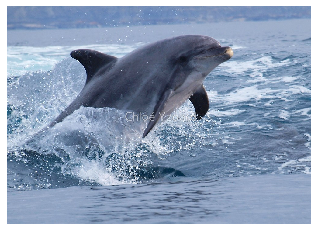

In [4]:
plt.imshow(a)
plt.axis('off')

In [5]:
a.shape

(717, 1000, 3)

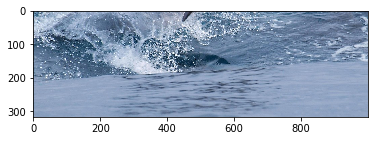

In [6]:
#Cropping Operation
plt.imshow(a[400:,:,:])

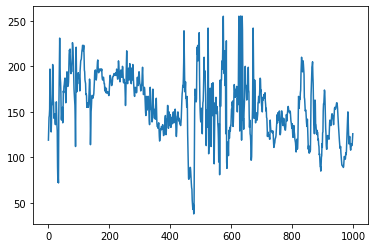

In [7]:
#Plotting values corresponding to the Green Channel 400th row and all columns
plt.plot(a[400,:,1])

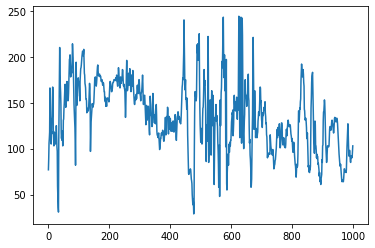

In [8]:
#Plotting values corresponding to the Red Channel 400th row and all columns
plt.plot(a[400,:,0])

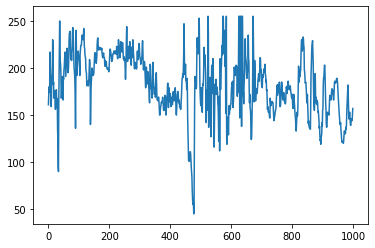

In [9]:
#Plotting values corresponding to the Blue Channel 400th row and all columns
plt.plot(a[400,:,2])

### Plotting Image only in specific Color Channels 


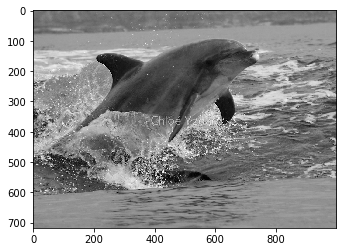

In [10]:
#Red
plt.imshow(a[:,:,0], cmap = 'gray')

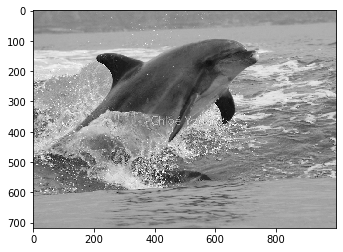

In [11]:
#Green
plt.imshow(a[:,:,1], cmap='gray')

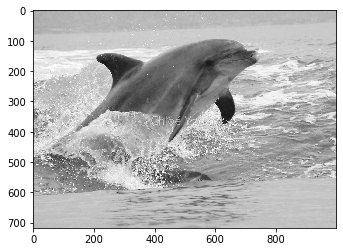

In [12]:
#Blue
plt.imshow(a[:,:,2],cmap = 'gray')

In [13]:
#Multiplying the image with a Scalar
def result(image, value):
  return image*value

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


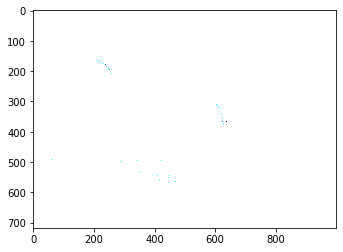

In [14]:
plt.imshow(result(a,0.5))

No image is displayed because of the issue discussed in this thread: https://github.com/matplotlib/matplotlib/issues/9391/ . 

Solution is in next line of code about how to resolve this issue

However Converting it to uint8 resolves this issue.

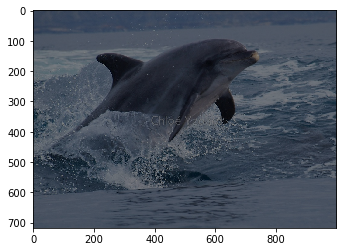

In [15]:
plt.imshow(result(a,0.5).astype(np.uint8)) #Since the factor is less than one it darkens the image

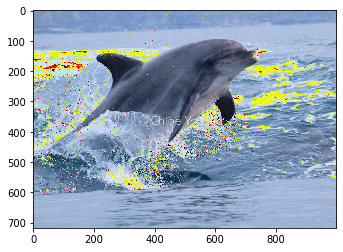

In [16]:
plt.imshow(result(a,1.1).astype(np.uint8)) #Since the factor is greater than one it brightens the image but there are artifacts as well due to washing out effects.

## Blending the Image

In [17]:
def blending(image1, image2, alpha):
    
    '''
    Summary blending
    Extended description of blending.
    Parameters
    ----------
    param1 : PIL Image (image1)
    
    param2 : PIL Image (image2)
    
    param3 : float alpha
    
    Returns
    -------
    Image
        combined image which is sum of scalar alpha*image1 + (1-alpha)*image2
    '''
    
    output = alpha*image1 + (1-alpha)*image2
    return output

In [18]:
!wget https://upload.wikimedia.org/wikipedia/commons/4/41/Left_side_of_Flying_Pigeon.jpg

--2019-08-05 18:46:01--  https://upload.wikimedia.org/wikipedia/commons/4/41/Left_side_of_Flying_Pigeon.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4134750 (3,9M) [image/jpeg]
Saving to: ‘Left_side_of_Flying_Pigeon.jpg.4’

Left_side_of_Flying 100%[===================>]   3,94M  2,83MB/s    in 1,4s    

2019-08-05 18:46:02 (2,83 MB/s) - ‘Left_side_of_Flying_Pigeon.jpg.4’ saved [4134750/4134750]



In [19]:
#a = Image.open('flat,1000x1000,075,f.u1.jpg')
image2 = Image.open('Left_side_of_Flying_Pigeon.jpg')
image2.size

(3556, 2371)

### Size of both images is not same we need to resize

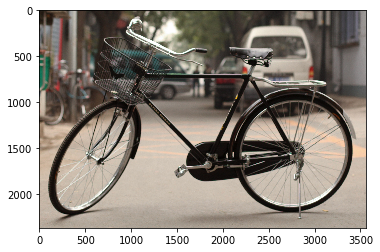

In [20]:
plt.imshow(image2)

In [26]:
image = image2.resize((a.shape[1],a.shape[0]), Image.ANTIALIAS)
print(image.size)
print(a.shape)
image = np.array(image)

(1000, 717)
(717, 1000, 3)


In [30]:
print(type(image))
blended_image = blending(a, image, 0.8)
#plt.imshow(blended_image)

<class 'numpy.ndarray'>


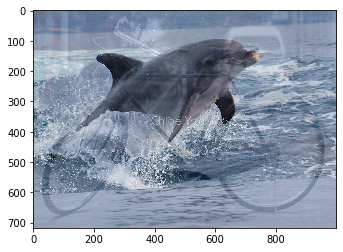

In [31]:
plt.imshow(blended_image.astype(np.uint8))